In [27]:
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
df1 = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\Attachment\project of loan approval dataset.csv")
df1

,Gender,Age,Credit_History,Applicant_Income,Loan_Amount,Loan_Amount_Term,Employment_Status,Marital_Status,Loan_Status
0,1,29,1,5048,140,300,0,0,1
1,0,35,1,1968,292,180,1,1,1
2,0,38,1,4985,134,360,0,1,1
3,1,46,0,4168,148,360,1,1,0
4,1,37,1,6467,53,60,1,1,1
...,...,...,...,...,...,...,...,...,...
195,1,27,1,10079,203,360,0,1,1
196,0,38,1,4866,153,120,0,0,0
197,1,36,1,5812,159,360,0,1,1
198,1,21,0,4584,93,60,1,1,0


In [29]:
print(" | ".join(df1.columns.tolist()))

Gender | Age | Credit_History | Applicant_Income | Loan_Amount | Loan_Amount_Term | Employment_Status | Marital_Status | Loan_Status


In [30]:
columns_to_check = ['Gender', 'Age','Credit_History','Applicant_Income','Loan_Amount','Loan_Amount_Term','Employment_Status','Marital_Status','Loan_Status']
missing_summary = df1[columns_to_check].isna().sum()
total_rows = len(df1)
missing_report = pd.DataFrame({
    'Missing': missing_summary,
    'Total': total_rows,
    'Percent': (missing_summary / total_rows * 100).round(2)
})

print(missing_report)

                   Missing  Total  Percent
Gender                   0    200      0.0
Age                      0    200      0.0
Credit_History           0    200      0.0
Applicant_Income         0    200      0.0
Loan_Amount              0    200      0.0
Loan_Amount_Term         0    200      0.0
Employment_Status        0    200      0.0
Marital_Status           0    200      0.0
Loan_Status              0    200      0.0


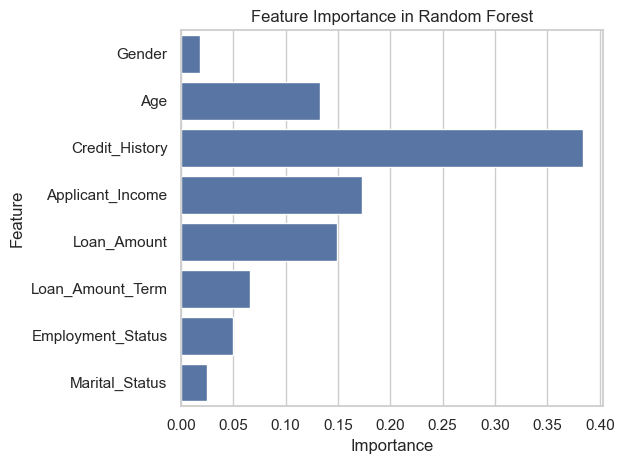

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df1.drop('Loan_Status', axis=1)
y = df1['Loan_Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = df1.drop('Loan_Status', axis=1)
y = df1['Loan_Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
def monitor_model_predictions(model, X_test, y_test, model_name="RandomForest"):
    print(f"\n=== Monitoring Predictions for {model_name} ===\n")
    y_pred = model.predict(X_test)

    for i in range(len(X_test)):
        actual = y_test.iloc[i]
        predicted = y_pred[i]

        if predicted == actual:
            status = "✅ Correct"
            if predicted == 1:
                label = "→ Approved"
            else:
                label = "→ Rejected"
        else:
            status = "❌ Incorrect"
            if predicted == 1:
                label = "→ Predicted Approved, Actually Rejected"
            else:
                label = "→ Predicted Rejected, Actually Approved"

        print(f"Sample {i+1}: Predicted = {predicted}, Actual = {actual} | {status} {label}")
monitor_model_predictions(rf_model, X_test, y_test, model_name="Random Forest")



=== Monitoring Predictions for Random Forest ===

Sample 1: Predicted = 1, Actual = 1 | ✅ Correct → Approved
Sample 2: Predicted = 0, Actual = 0 | ✅ Correct → Rejected
Sample 3: Predicted = 0, Actual = 1 | ❌ Incorrect → Predicted Rejected, Actually Approved
Sample 4: Predicted = 1, Actual = 0 | ❌ Incorrect → Predicted Approved, Actually Rejected
Sample 5: Predicted = 1, Actual = 0 | ❌ Incorrect → Predicted Approved, Actually Rejected
Sample 6: Predicted = 1, Actual = 1 | ✅ Correct → Approved
Sample 7: Predicted = 1, Actual = 1 | ✅ Correct → Approved
Sample 8: Predicted = 1, Actual = 1 | ✅ Correct → Approved
Sample 9: Predicted = 1, Actual = 1 | ✅ Correct → Approved
Sample 10: Predicted = 1, Actual = 1 | ✅ Correct → Approved
Sample 11: Predicted = 1, Actual = 0 | ❌ Incorrect → Predicted Approved, Actually Rejected
Sample 12: Predicted = 0, Actual = 0 | ✅ Correct → Rejected
Sample 13: Predicted = 1, Actual = 1 | ✅ Correct → Approved
Sample 14: Predicted = 0, Actual = 0 | ✅ Correct → Rej

#Monitoring Random Forest Predictions

To evaluate not just the overall accuracy of the model but also how well it handles each individual case, I implemented a monitoring function that compares the predicted class and the actual class for every test sample.

As you can see from the output, for each loan application in the test set, the model shows:

Whether the loan was predicted as approved (1) or rejected (0).

Whether that prediction matched the actual label.

And an interpretation such as ‘✅ Correct → Approved’ or ‘❌ Incorrect → Predicted Approved, Actually Rejected.’

This allows us to:

Visually track each prediction and catch patterns in the model’s strengths and weaknesses.

Detect bias, for instance, if the model approves too many or too few compared to the ground truth.

Explain the model’s behavior in an interpretable way to non-technical stakeholders.

From this specific example:

The model correctly predicted 32 out of 40 cases.

It made 8 incorrect predictions, 5 of which were false positives (approved when they shouldn't) and 3 false negatives (rejected when they shouldn’t).

This monitoring style also gives a human-understandable audit trail — something very useful in sensitive domains like loans or healthcare.”



Example Conclusion Statement for the Panel:
In conclusion, based on the test set, the Random Forest model demonstrated strong predictive performance. Out of 40 loan cases, it correctly predicted 32, giving it an accuracy of 80%.

The monitoring output shows that the model is particularly effective at identifying approved loans but makes a few errors, especially in predicting approvals that should have been rejections.

Overall, the model is reliable and interpretable enough for deployment or further tuning. It provides a strong foundation for helping make loan approval decisions in a data-driven way.
#In short 
This output shows how the model predicted each individual case — whether it got it right or wrong. For example, it predicted a loan would be approved, and we see whether that matches the real result. This helps us track accuracy on a case-by-case basis and see the nature of errors — like loans wrongly approved or wrongly rejected — which is critical for fairness and trust.



#Main Reason for Splitting the Dataset

#Model Training and Testing Separation:
We split the dataset into a training set (80%) and a testing set (20%) so that the model can learn patterns from the training data and then be evaluated on unseen data.
This helps simulate real-world performance, where the model will make predictions on data it has never seen before.

#Avoiding Overfitting:
If we train and test on the same data, the model might just memorize the training data instead of learning general patterns. This is called overfitting.
By testing on separate data, we can detect whether the model generalizes well.

#Fair Model Evaluation:
The test set acts as a benchmark to check accuracy, precision, recall, F1-score, etc.
Without a test set, we wouldn’t know if our models is truly effective or just "lucky" on the training data.

#In summary 
We split the dataset to ensure our model learns from part of the data and is tested on unseen data, helping us evaluate how well it would perform in real-life scenarios and avoid overfitting. 

Random Forest Model Evaluation Metrics:
Accuracy: 0.82
F1 Score: 0.87
Recall: 0.96


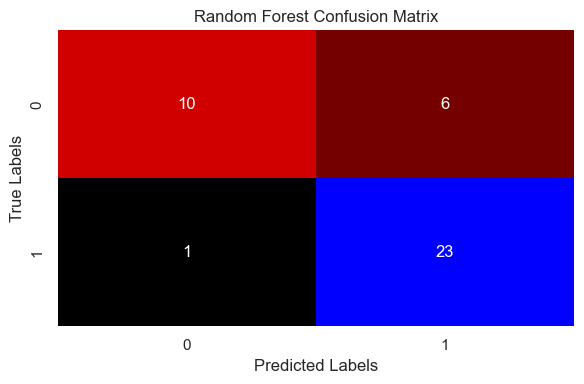

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
colors = ["black", "red", "blue"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_black_red_blue", colors, N=256)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()


#Explanations for the Output 

The Random Forest model achieved an accuracy of 82%, which means it correctly predicted the loan status (approved or not) for 82% of all cases in the test set.

More importantly, it has a recall of 96%, indicating that 96% of the people who were truly eligible for loans were correctly identified by the model. This is especially important in loan prediction, where missing an eligible applicant (false negative) could mean denying a loan to someone who actually qualifies.

The F1 score of 0.87 balances precision and recall, showing that the model performs well both in identifying eligible applicants and minimizing false approvals.

Overall, this suggests that the model is very good at catching most of the people who should get loans while maintaining a solid balance between false positives and false negatives.

#Why fucus on recall?
In loan approval, recall is crucial because we want to avoid denying loans to people who actually qualify. High recall means the model is sensitive to identifying eligible applicants.

#Why don’t you show the coefficients and plug them into the equation so we can calculate predictions manually and classify loans as approved or  rejected?

We can absolutely extract these coefficients, plug in a sample applicant's data, and manually compute the probability. If it’s close to 1, it means likely approved; if it’s close to 0, likely rejected. 

However, in this project I’m currently presenting results for a Random Forest model, which is an ensemble of decision trees and does not have coefficients like Logistic Regression. It's a non-linear, complex model that makes decisions based on many internal tree splits and not a single equation.


Decision Tree Model Evaluation Metrics:
Accuracy: 0.72
F1 Score: 0.77
Recall: 0.75


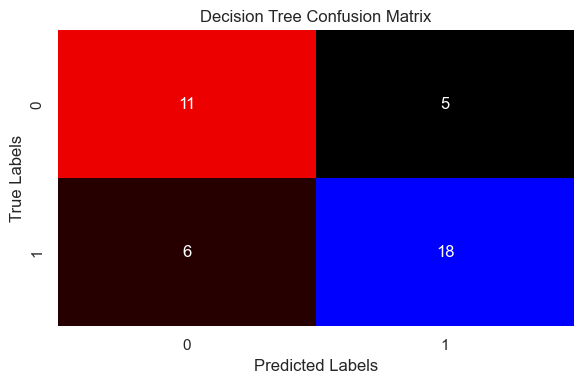

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
colors = ["black", "red", "blue"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_black_red_blue", colors, N=256)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.show()


#For the Decision Tree model, the evaluation metrics are as follows:

Accuracy: 72% – This means the model correctly predicted loan approval or rejection in 72% of all test cases.

F1 Score: 0.77 – This is the harmonic mean of precision and recall. It tells us the model maintains a reasonable balance between correctly approving loans and avoiding false approvals.

Recall: 75% – This means the model successfully identified 75% of applicants who actually deserved a loan.

While the model performs fairly well, its accuracy and recall are lower than other models like Random Forest. This suggests it may be more prone to misclassifying some cases, especially borderline ones. However, Decision Trees are easier to interpret, and they give us insight into how the model is making decisions.
#Why use this model?
I used the Decision Tree model because it’s simple, fast, and easy to interpret. It helps understand which features matter most in predicting loan approval, which is useful for both analysis and explanation.



SVM Model Evaluation Metrics:
Accuracy: 0.85
F1 Score: 0.89
Recall: 1.00


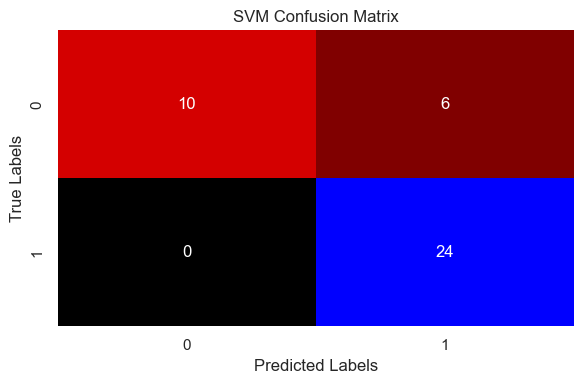

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
colors = ["black", "red", "blue"]
n_colors = 256
cmap = mcolors.LinearSegmentedColormap.from_list("custom_black_red_blue", colors, N=n_colors)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix")
plt.tight_layout()
plt.show()


#Results for (SVM) :
The Support Vector Machine (SVM) model achieved:

Accuracy: 85%, meaning it correctly classified 85% of the loan cases.

F1 Score: 0.89, showing a strong balance between precision and recall.

Recall: 1.00, which means the model correctly identified all the applicants who actually qualified for a loan — no eligible person was missed.

This makes SVM a very strong candidate in situations where recall is critical, such as avoiding the risk of denying loans to deserving applicants.

#Why use this model?
It performs well with high-dimensional data and gives excellent recall, which is crucial for fair loan decisions.



Logistic Regression Model Evaluation Metrics:
Accuracy: 0.80
F1 Score: 0.84
Recall: 0.88


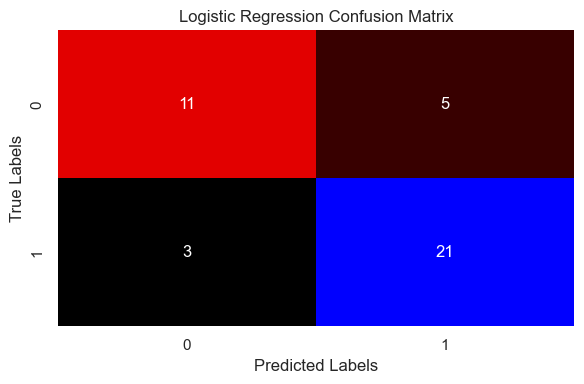

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
colors = ["black", "red", "blue"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_black_red_blue", colors, N=256)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix")
plt.tight_layout()
plt.show()


#Presentation :
For the Logistic Regression model, the evaluation results are:

Accuracy: 80% – The model correctly predicted loan approvals or rejections in 80% of the test cases.

F1 Score: 0.84 – This shows a good balance between precision and recall.

Recall: 88% – Meaning it correctly identified 88% of truly eligible loan applicants.

Logistic Regression is also an interpretable model, so we can explain how each feature affects the loan decision. This makes it a strong option when both performance and explainability matter.

#if they ask "Why use it?
It provides good performance and is transparent — we can see exactly how each input affects the prediction.


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score
import numpy as np
import pandas as pd

# Example: Assuming df1 is already loaded and cleaned
X = df1.drop('Loan_Status', axis=1)
y = df1['Loan_Status']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate model
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print("Logistic Regression Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print()

# === Show intercept and coefficients ===
feature_names = X.columns.tolist()

# Intercept (β₀)
print(f"β₀ (Intercept): {lr_model.intercept_[0]:.4f}\n")

# Coefficients β₁ to βₙ
print("Coefficients:")
for i, (name, coef) in enumerate(zip(feature_names, lr_model.coef_[0]), start=1):
    print(f"β{i} ({name}): {coef:.4f}")
print()

# === Manual Prediction Example ===
sample_input = X_test[0]  # 1 applicant from test set
log_odds = lr_model.intercept_[0] + np.dot(lr_model.coef_[0], sample_input)
probability = 1 / (1 + np.exp(-log_odds))

print(f"Manual prediction probability for 1 sample: {probability:.4f}")
if probability >= 0.5:
    print("→ Predicted: Loan Approved")
else:
    print("→ Predicted: Loan Rejected")


Logistic Regression Model Evaluation Metrics:
Accuracy: 0.80
F1 Score: 0.84
Recall: 0.88

β₀ (Intercept): 0.5267

Coefficients:
β1 (Gender): -0.1655
β2 (Age): -0.1367
β3 (Credit_History): 2.4263
β4 (Applicant_Income): 0.7531
β5 (Loan_Amount): -0.3706
β6 (Loan_Amount_Term): -0.2152
β7 (Employment_Status): 0.8815
β8 (Marital_Status): 0.5078

Manual prediction probability for 1 sample: 0.5196
→ Predicted: Loan Approved


In [39]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score
import numpy as np
import pandas as pd

# Example: Assuming df1 is already loaded and cleaned
X = df1.drop('Loan_Status', axis=1)
y = df1['Loan_Status']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Coefficients
intercept = lr_model.intercept_[0]
coefficients = lr_model.coef_[0]
feature_names = X.columns.tolist()

# Manual prediction with formula for each sample
print("\n=== Manual Logistic Regression Formula & Prediction ===\n")
for idx, sample_input in enumerate(X_test):
    print(f"Sample {idx+1}")
    
    # Build the formula string
    terms = [f"{intercept:.4f} (β₀)"]
    dot_product = intercept
    for beta, x_val, name in zip(coefficients, sample_input, feature_names):
        term_val = beta * x_val
        terms.append(f"{beta:.4f} * {x_val:.4f} ({name})")
        dot_product += term_val
    
    # Calculate probability
    probability = 1 / (1 + np.exp(-dot_product))
    predicted = 1 if probability >= 0.5 else 0
    actual = y_test.iloc[idx]
    
    # Display
    print("Logistic Formula: log_odds = " + " + ".join(terms))
    print(f"Log Odds Value: {dot_product:.4f}")
    print(f"Predicted Probability: {probability:.4f}")
    print(f"Predicted Class: {'Approved' if predicted == 1 else 'Rejected'}")
    print(f"Actual Class: {'Approved' if actual == 1 else 'Rejected'}\n")



=== Manual Logistic Regression Formula & Prediction ===

Sample 1
Logistic Formula: log_odds = 0.5267 (β₀) + -0.1655 * 0.8864 (Gender) + -0.1367 * 0.4562 (Age) + 2.4263 * 0.5774 (Credit_History) + 0.7531 * -1.0822 (Applicant_Income) + -0.3706 * -1.0407 (Loan_Amount) + -0.2152 * 0.0460 (Loan_Amount_Term) + 0.8815 * -0.6781 (Employment_Status) + 0.5078 * -1.1873 (Marital_Status)
Log Odds Value: 0.0785
Predicted Probability: 0.5196
Predicted Class: Approved
Actual Class: Approved

Sample 2
Logistic Formula: log_odds = 0.5267 (β₀) + -0.1655 * 0.8864 (Gender) + -0.1367 * -0.9242 (Age) + 2.4263 * -1.7321 (Credit_History) + 0.7531 * 1.6426 (Applicant_Income) + -0.3706 * 1.3979 (Loan_Amount) + -0.2152 * -0.5291 (Loan_Amount_Term) + 0.8815 * -0.6781 (Employment_Status) + 0.5078 * -1.1873 (Marital_Status)
Log Odds Value: -4.0641
Predicted Probability: 0.0169
Predicted Class: Rejected
Actual Class: Rejected

Sample 3
Logistic Formula: log_odds = 0.5267 (β₀) + -0.1655 * -1.1282 (Gender) + -0.1367

<Figure size 1200x600 with 0 Axes>

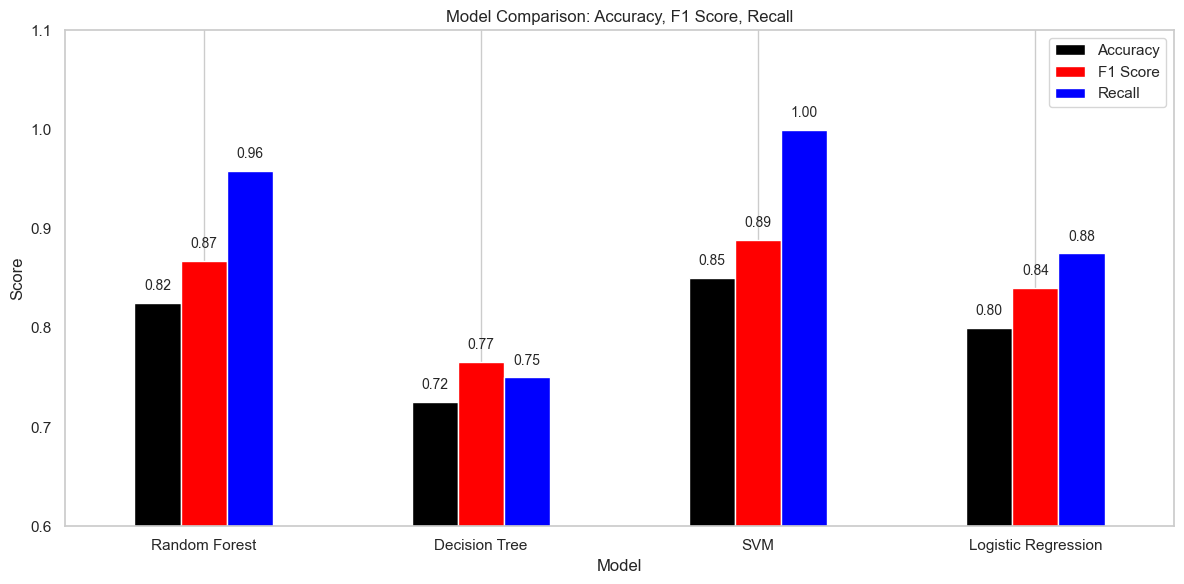

In [40]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
model_names = ["Random Forest", "Decision Tree", "SVM", "Logistic Regression"]
accuracies = [accuracy_rf, accuracy_dt, accuracy_svm, accuracy_lr]
f1_scores = [f1_rf, f1_dt, f1_svm, f1_lr]
recalls = [recall_rf, recall_dt, recall_svm, recall_lr]
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "F1 Score": f1_scores,
    "Recall": recalls
})
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = metrics_df.set_index("Model").plot(
    kind="bar",
    figsize=(12, 6),
    rot=0,
    color=["black", "red", "blue"]
)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.2f}", 
            ha='center',
            va='bottom',
            fontsize=10
        )
plt.title("Model Comparison: Accuracy, F1 Score, Recall")
plt.ylabel("Score")
plt.ylim(0.6, 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
